In [1]:

import os
import sys
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from itertools import product
from sklearn.preprocessing import RobustScaler, LabelEncoder

sys.path.extend([
                '../src',
                '../data',
                ])

from utils import run_nested_cv_3b

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

#limb
right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

le = LabelEncoder()
right['use_type_encoded'] = le.fit_transform(right['use_type'])
left['use_type_encoded'] = le.fit_transform(left['use_type'])
affected['use_type_encoded'] = le.fit_transform(affected['use_type'])
unaffected['use_type_encoded'] = le.fit_transform(unaffected['use_type'])

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], ignore_index=True)

architecture = {
                'num_filters': [50, 25],
                'filter_sizes': [5, 5],
                'pool_sizes': [5, 5]
               }

CPU


2025-07-10 19:45:04.780102: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.247
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.346


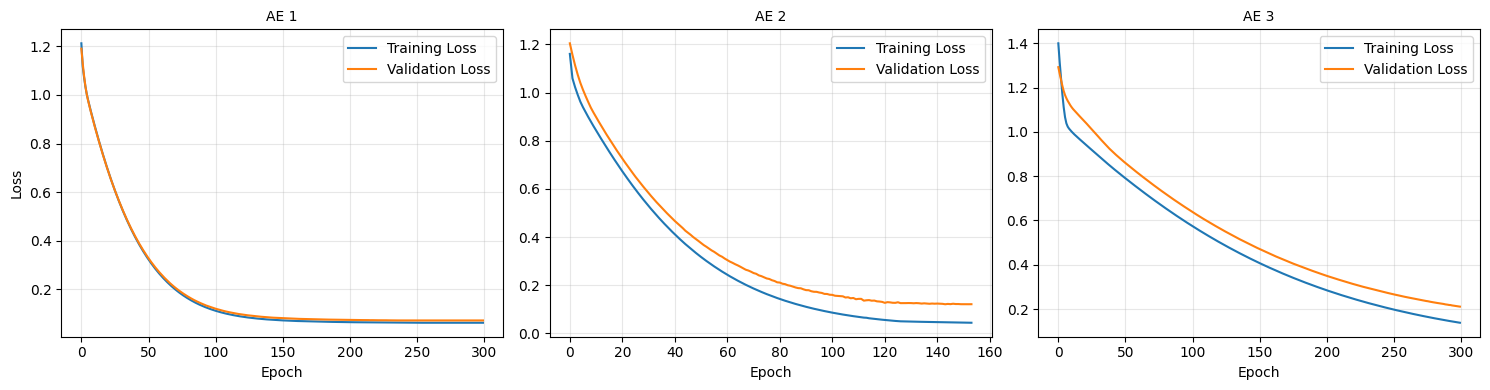

Limb: 1 Subject: 1 Youden Index: 0.4306972789115646 Sensitivity: 0.9931972789115646 Specificity: 0.4375
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.239
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.359


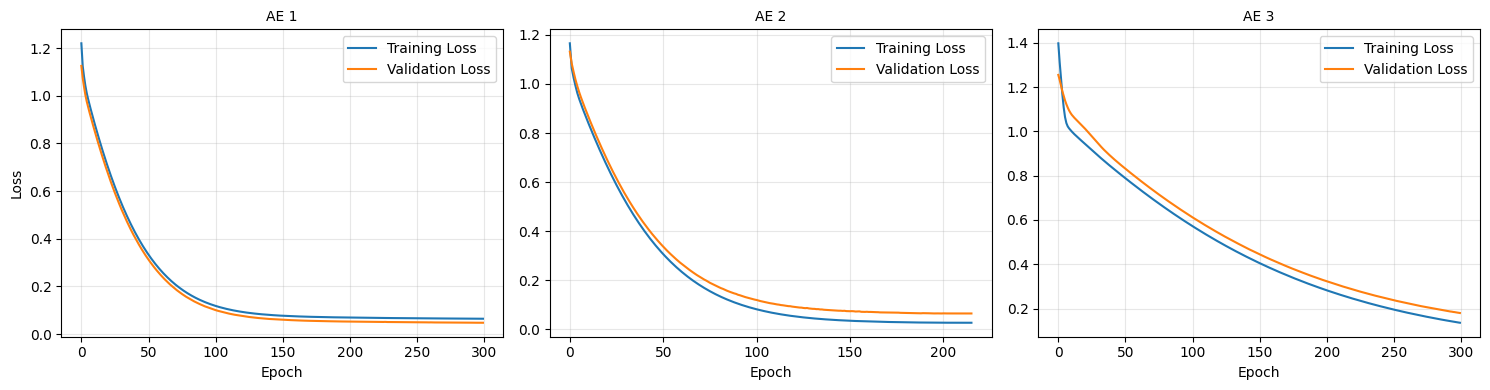

Limb: 1 Subject: 2 Youden Index: 0.1724137931034484 Sensitivity: 1.0 Specificity: 0.1724137931034483
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.249
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.327


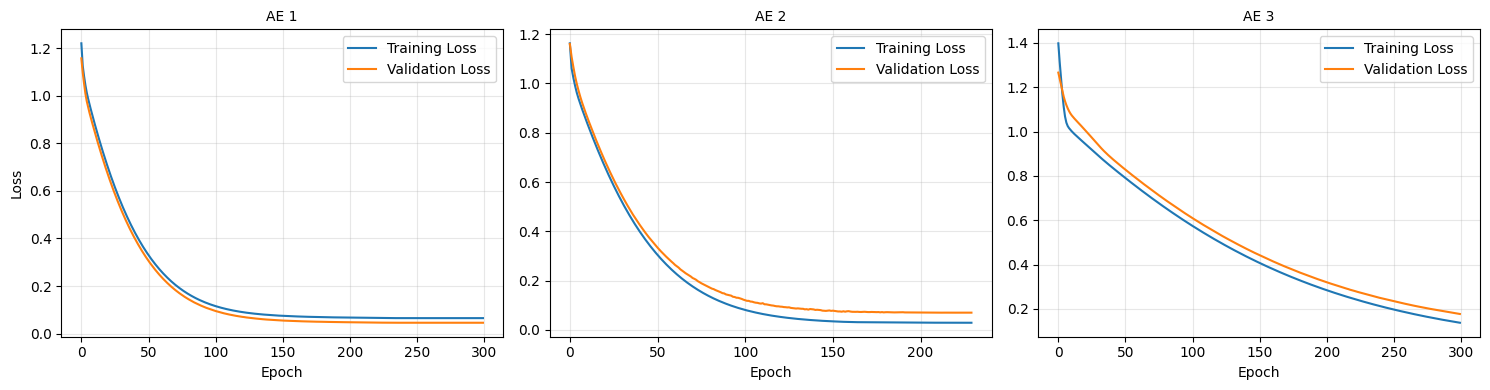

Limb: 1 Subject: 3 Youden Index: 0.5 Sensitivity: 1.0 Specificity: 0.5
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.212
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.310


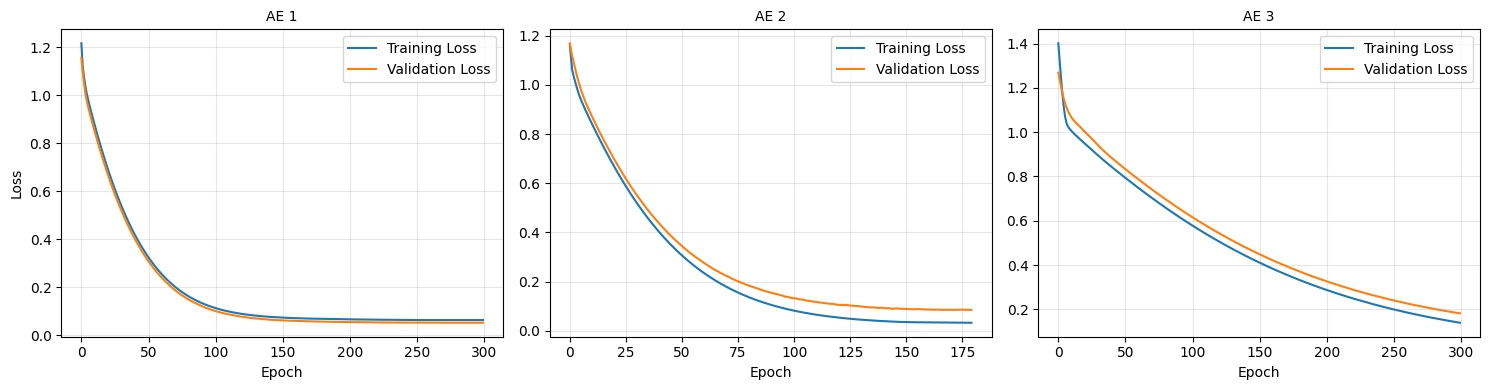

Limb: 1 Subject: 4 Youden Index: 0.6200000000000001 Sensitivity: 1.0 Specificity: 0.62
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.199
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.339


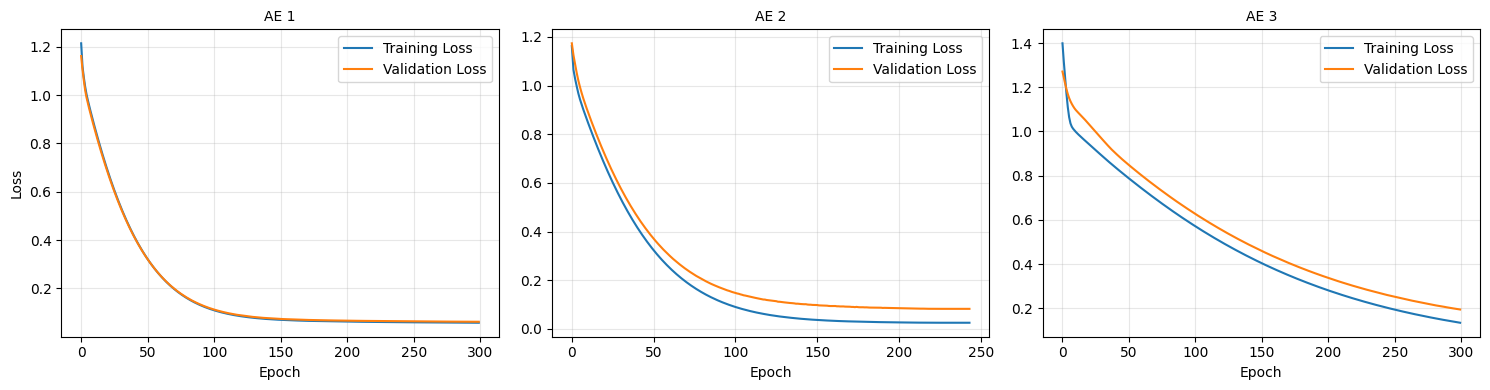

Limb: 1 Subject: 5 Youden Index: 0.38095238095238093 Sensitivity: 1.0 Specificity: 0.38095238095238093
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.209
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.352


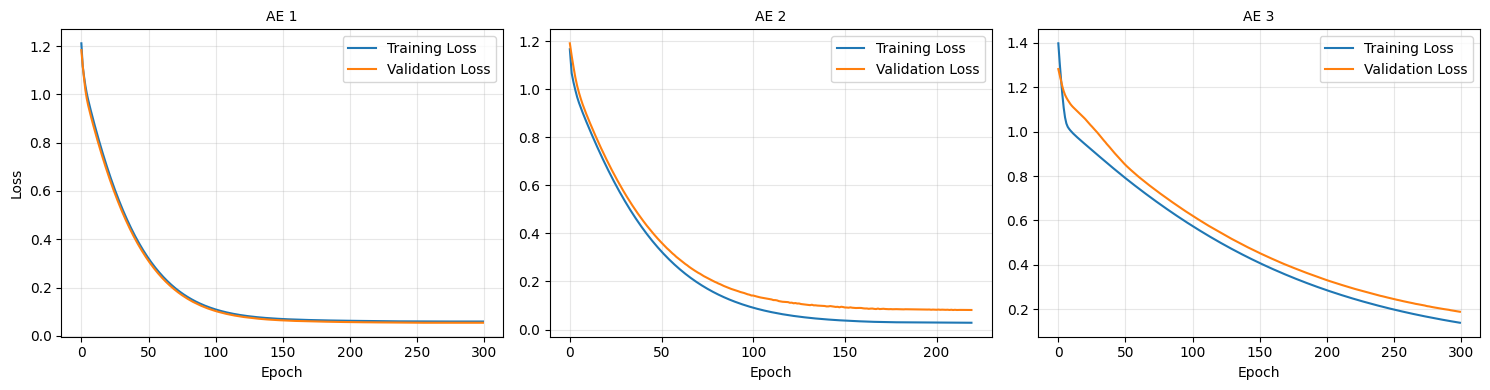

Limb: 1 Subject: 6 Youden Index: 0.2446407691308301 Sensitivity: 0.9888268156424581 Specificity: 0.2558139534883721
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.307
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.360


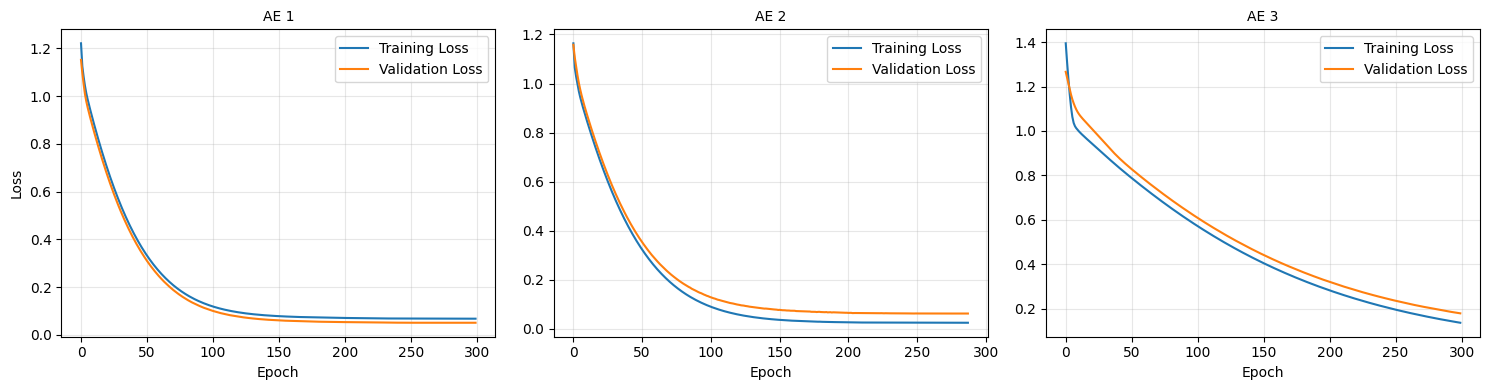

Limb: 1 Subject: 7 Youden Index: 0.2673025732031944 Sensitivity: 0.9846938775510204 Specificity: 0.2826086956521739
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.231
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.350


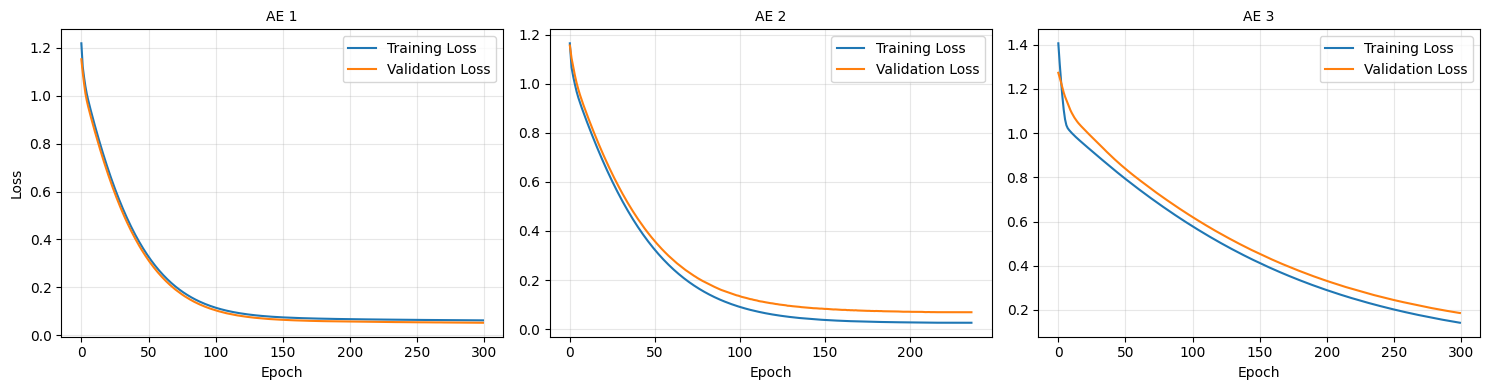

Limb: 1 Subject: 8 Youden Index: 0.29209031100478455 Sensitivity: 0.9952153110047847 Specificity: 0.296875
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.296
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.368


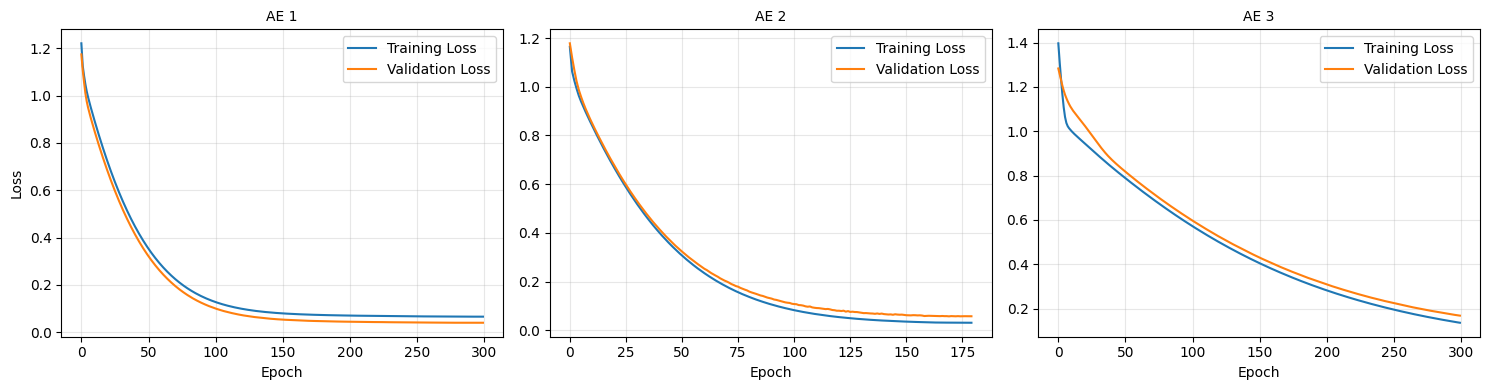

Limb: 1 Subject: 9 Youden Index: 0.1434088116552572 Sensitivity: 0.995260663507109 Specificity: 0.14814814814814814
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.206
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x3531b4a00>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x3531b48b0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x322acc8b0>, 'optimizer': 'nadam'} with score: 0.356


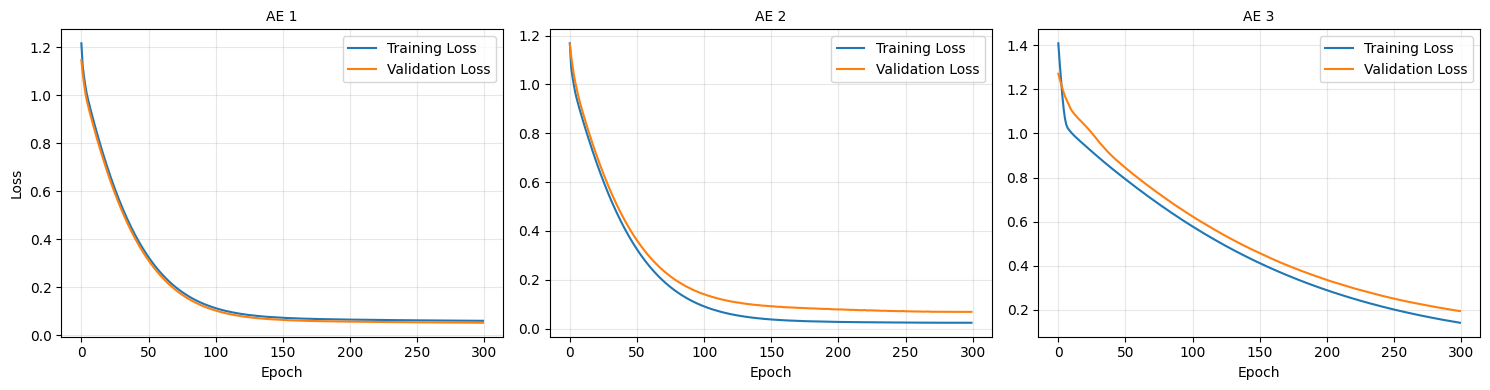

Limb: 1 Subject: 10 Youden Index: 0.265625 Sensitivity: 1.0 Specificity: 0.265625


In [2]:


approach = 3
filename = f'../results/approach3b/limb_nested_cv_right.csv'

window_size = 100
epochs = 300
batch_size = 32
class_loss = False
plot_hist = False

error_func = 'mae'

X = right[['ax', 'ay', 'az']]
y = right['gnd']
subjects = right['subject']
limbs = right['limb']
usetypes = right['use_type_encoded']

hp = {
    'activation': ['tanh'],
    'kernel_init': [tf.keras.initializers.GlorotNormal(seed=42), ],           
    'bias_init': [tf.keras.initializers.Zeros()],
    'optimizer': ['nadam'],
    'loss': [tf.keras.losses.mean_squared_error, ],     
    'learning_rate': [0.0001],
    'batch_norm': [True, False]
    }

results_3b = run_nested_cv_3b(window_size,             
                              X=X,                         
                              y=y,                        
                              subjects=subjects,           
                              limbs=limbs,   
                              usetypes=usetypes,                  
                              architecture=architecture,   
                              hp_grid=hp,
                              epochs=epochs,                  
                              batch_size=batch_size,              
                              class_loss=False,           
                              plot_hist=True,            
                              error_func='None')
